<a href="https://colab.research.google.com/github/dianaesquivell/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Artes", "Música", "Informática"
]

# Generar nombres y apellidos aleatorios (para simplificar, usaremos nombres comunes)
nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Carla", "José", "Laura", "Diego", "Sofia"]
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Gómez", "Sánchez", "Romero"]

# Crear lista de datos
data = []
for _ in range(100):
  nombre = random.choice(nombres)
  apellido = random.choice(apellidos)
  dni = random.randint(10000000, 99999999)
  for materia in random.sample(materias, random.randint(3, 5)):
    nota1 = round(random.uniform(4, 10), 1)
    nota2 = round(random.uniform(4, 10), 1)
    nota3 = round(random.uniform(4, 10), 1)
    faltas = random.randint(0, 15)
    data.append([nombre, apellido, dni, materia, nota1, nota2, nota3, faltas])

# Crear DataFrame
df = pd.DataFrame(data, columns=["Nombre", "Apellido", "Nro_DNI", "Materia", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Nombre,Apellido,Nro_DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,José,López,42034198,Lengua y Literatura,4.8,9.8,5.4,1
1,José,López,42034198,Ciencias Naturales,6.0,9.5,8.4,2
2,José,López,42034198,Química,4.5,9.0,7.4,14
3,José,López,42034198,Sociología,7.8,6.0,4.6,1
4,José,López,42034198,Matemática,6.3,7.9,7.0,1
...,...,...,...,...,...,...,...,...
396,Ana,Gómez,45870862,Ciencias Naturales,9.9,8.9,9.9,14
397,José,García,63135064,Educación Física,4.4,7.1,8.0,12
398,José,García,63135064,Química,6.1,9.3,4.3,0
399,José,García,63135064,Física,9.8,7.1,9.5,8


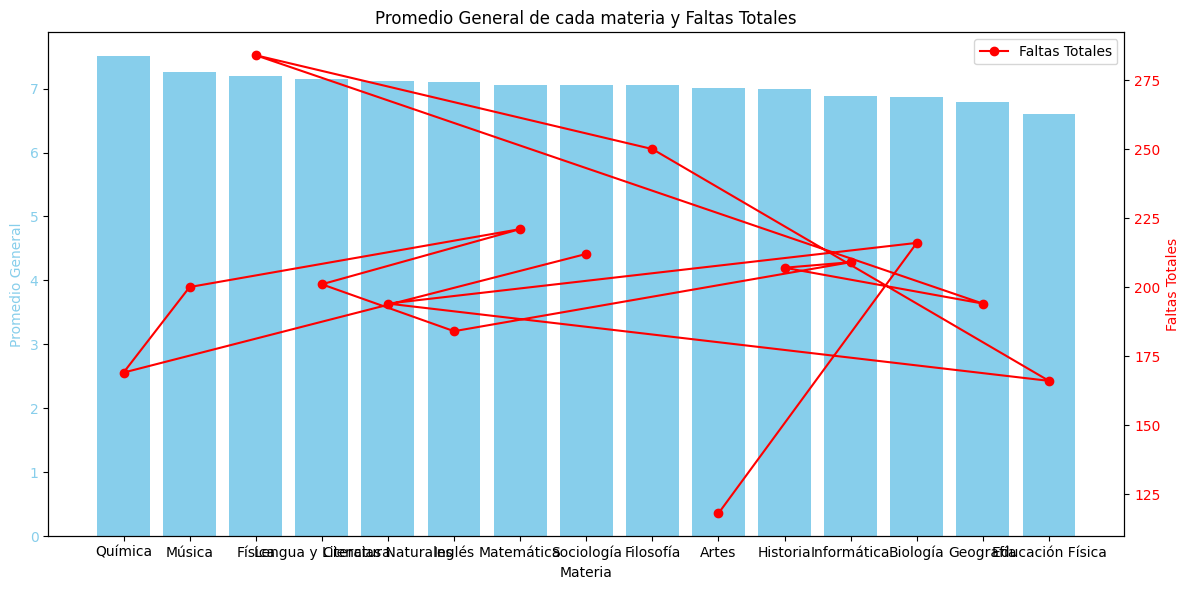

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar de mayor a menor promedio
promedio_por_materia = promedio_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para el promedio
ax1.bar(promedio_por_materia.index, promedio_por_materia.values, color='skyblue')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de cada materia y Faltas Totales')

# Segundo eje Y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar la leyenda
plt.legend(['Faltas Totales', 'Promedio General'], loc='upper right')

# Ajustar el espacio entre las barras y el título
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)
